# 独立成分分析


In [198]:
import numpy as np
import matplotlib.pyplot as plt

## 擬似データの生成 
それぞれ異なる信号源を3種類生成
- a: サイン波
- b: 矩形波
- c: ノコギリ波

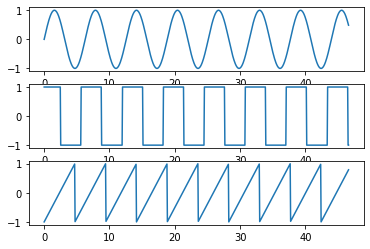

In [238]:
t = np.linspace(0, 200, 3000)

a = np.sin(t)
b = np.where(np.sin(t+np.pi/5) > 0, 1, -1)
c = 2*(t % ((3/2) * np.pi)) / ((3/2) * np.pi) - 1
s = np.c_[a, b, c].T

def show_sig(sig):
    fig, axes = plt.subplots(len(sig))
    for i in range(len(sig)):
        axes[i].plot(t[:700], sig[i][:700])
    fig.show()
    
show_sig(s)

## 信号源合成
未知の合成プロセスAで各信号源は合成される。
ノイズを含む場合も多い。

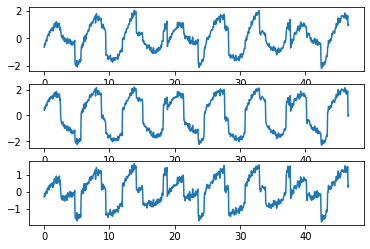

In [253]:
A = np.random.rand(3, 3)
e = 0.13
x = A @ s + e * np.random.randn(s.shape[1])

show_sig(x)

## 観測信号のガウス性
各信号のヒストグラムを描画。
ガウス性を独立性の尺度として使うため。

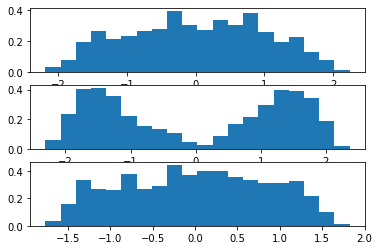

In [254]:
def show_hist(sig):
    fig, axes = plt.subplots(len(sig))
    for i in range(len(sig)):
        axes[i].hist(sig[i], bins=20, density=True)
    plt.show()
    
show_hist(x)

## 前処理
次の2種類を行う。
FastICAがFastになるために必要。

### 中心化
要は平均を引くこと。

### 白色化
固有値分解等による無相関化及び、正規化。

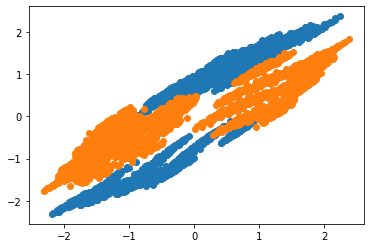

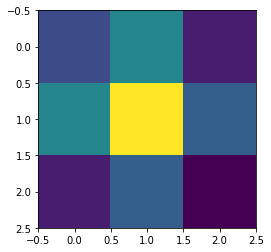

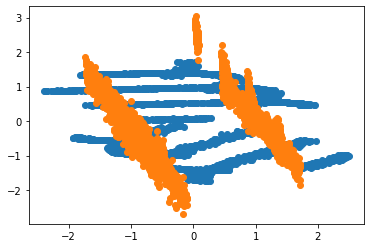

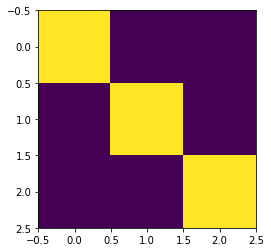

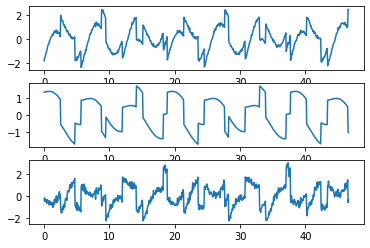

In [255]:
def centering(sig):
    c_sig = sig - np.mean(sig, axis=1).reshape(-1, 1)
    return c_sig
    
def whitening(sig, plot=True):
    cov_mat = sig@sig.T/sig.shape[1]
   
    # E is eigen vectors matrix
    eig_vals, E = np.linalg.eig(cov_mat)  
    D = eig_vals * np.eye(len(eig_vals))
    w_sig = E @ np.linalg.inv(np.sqrt(D)) @ E.T @ sig
    return w_sig

# before the preprocess
plt.scatter(x[0], x[1])
plt.scatter(x[1], x[2])
plt.show()

plt.imshow(x@x.T)
plt.show()

x_ = whitening(centering(x))
    
# after the preprocess
plt.scatter(x_[0], x_[1])
plt.scatter(x_[1], x_[2])
plt.show()

plt.imshow(x_@x_.T)
plt.show()

show_sig(x_)

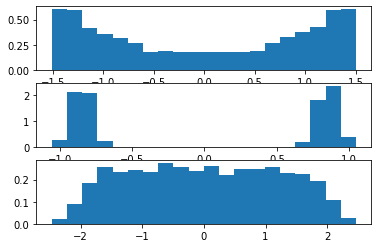

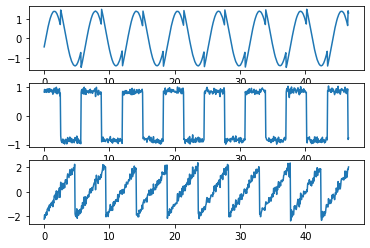

In [264]:
def FastICA(
        x,
        g1=lambda u: np.tanh(u),
        g2=lambda u: u*np.exp(-u**2/2),
        max_iter=100
    ):
    n_components, length = x.shape
    w = np.random.randn(n_components, n_components)
    
    for i in range(max_iter):
        w = (x@(g1(w.T@x).T)/length - 
            np.mean(g2(w.T@x), axis=1)*w)
        w = w / np.linalg.norm(w, axis=1)
    return w.T@x
        
    
pred_x = FastICA(x_, max_iter=1000)
show_hist(pred_x)
show_sig(pred_x)

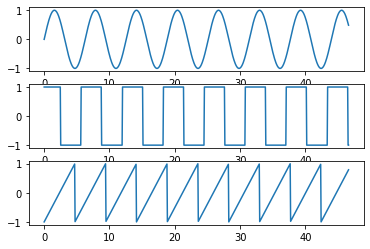

In [265]:
show_sig(s)